In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
merged_data_path = '/home/safidy/airflow/data/merged_data.csv'
aggregated_data_path = '/home/safidy/airflow/data/daily_aggregated_data.csv'


In [3]:
# Charger les données
data = pd.read_csv(merged_data_path)
daily_data = pd.read_csv(aggregated_data_path)

In [5]:
print("Calcul de la matrice de corrélations...")

Calcul de la matrice de corrélations...


In [6]:
# Filtrer les colonnes numériques
numeric_data = data.select_dtypes(include=['number'])

In [7]:
# Calculer la matrice de corrélations
correlation_matrix = numeric_data.corr()
print("Matrice de corrélation :")
print(correlation_matrix)

Matrice de corrélation :
                                                  timestamp     PM2.5  \
timestamp                                      1.000000e+00 -0.171317   
PM2.5                                         -1.713169e-01  1.000000   
PM10                                          -1.510862e-01  0.998693   
O3                                            -3.565138e-01  0.256155   
NO2                                            7.231376e-01 -0.145310   
SO2                                           -1.791124e-01 -0.192964   
CO                                            -9.971870e-02  0.987061   
Population                                     3.461078e-01 -0.295831   
Density (people/km²)                          -4.469561e-01 -0.167120   
Urbanization (%)                              -1.250140e-09 -0.757915   
Average Income (USD)                           3.361058e-01 -0.531750   
Education Level (% with Bachelor's or higher)  2.010991e-01 -0.519962   
Altitude (m)              

In [8]:
# Sauvegarder la matrice de corrélations dans un fichier CSV
correlation_matrix.to_csv('/home/safidy/airflow/data/correlation_matrix.csv')

Création de la heatmap des corrélations...


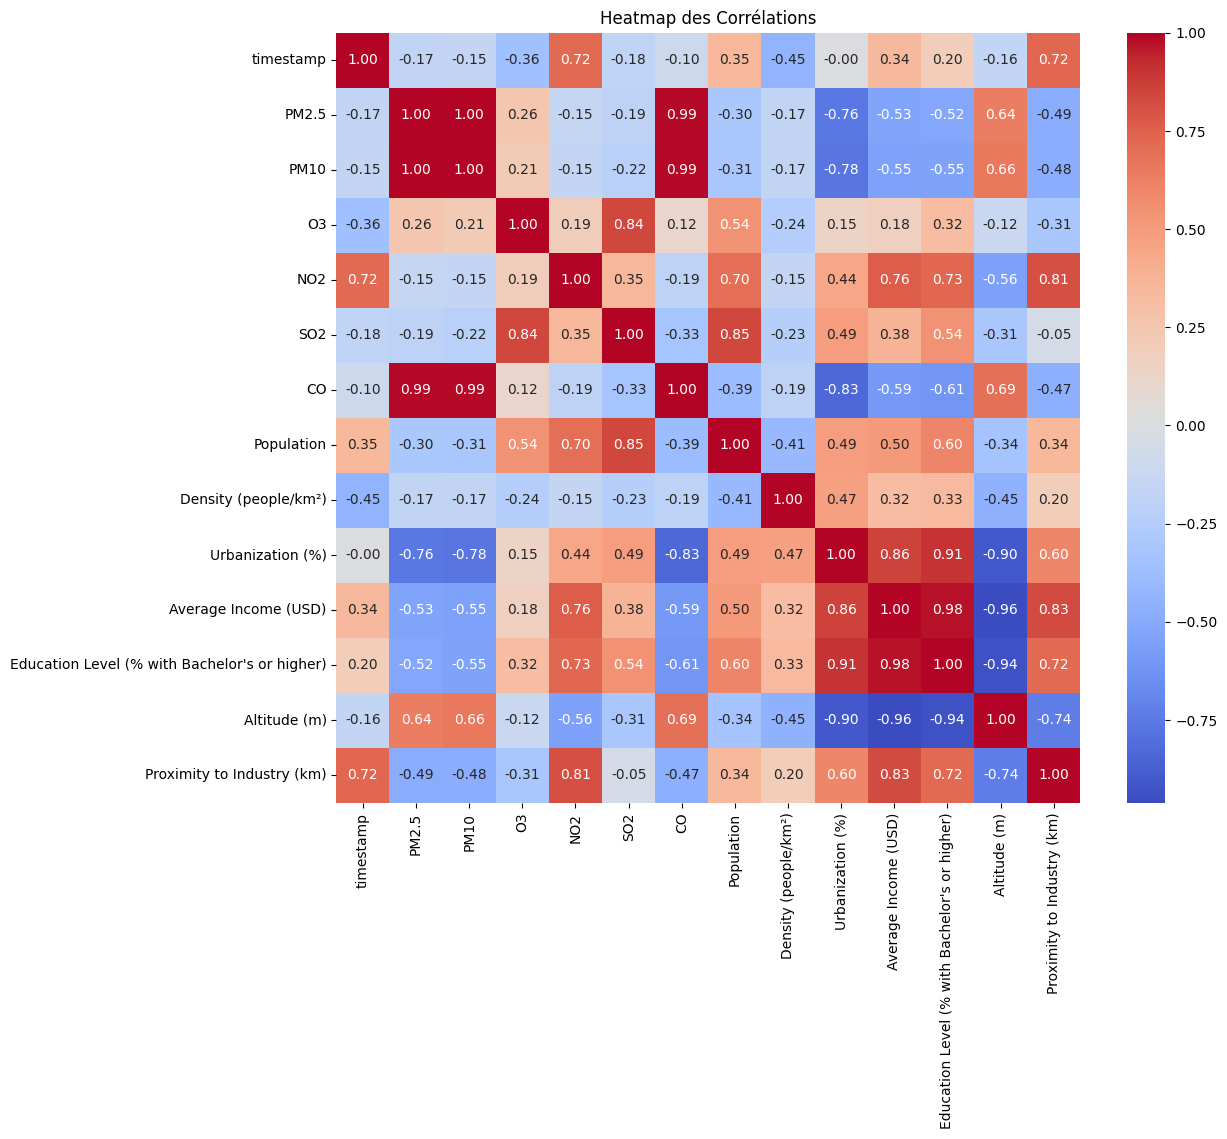

In [9]:
# Visualiser la matrice de corrélations avec une heatmap
print("Création de la heatmap des corrélations...")
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des Corrélations')
plt.savefig('/home/safidy/airflow/data/correlation_heatmap.png')
plt.show()

In [10]:
# 2. Analyse des Tendances
print("Analyse des tendances des niveaux de pollution...")

Analyse des tendances des niveaux de pollution...


In [11]:
# Convertir la colonne 'timestamp' en datetime
daily_data['timestamp'] = pd.to_datetime(daily_data['timestamp'])


In [12]:
# Créer des graphiques pour chaque polluant
pollutants = ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']


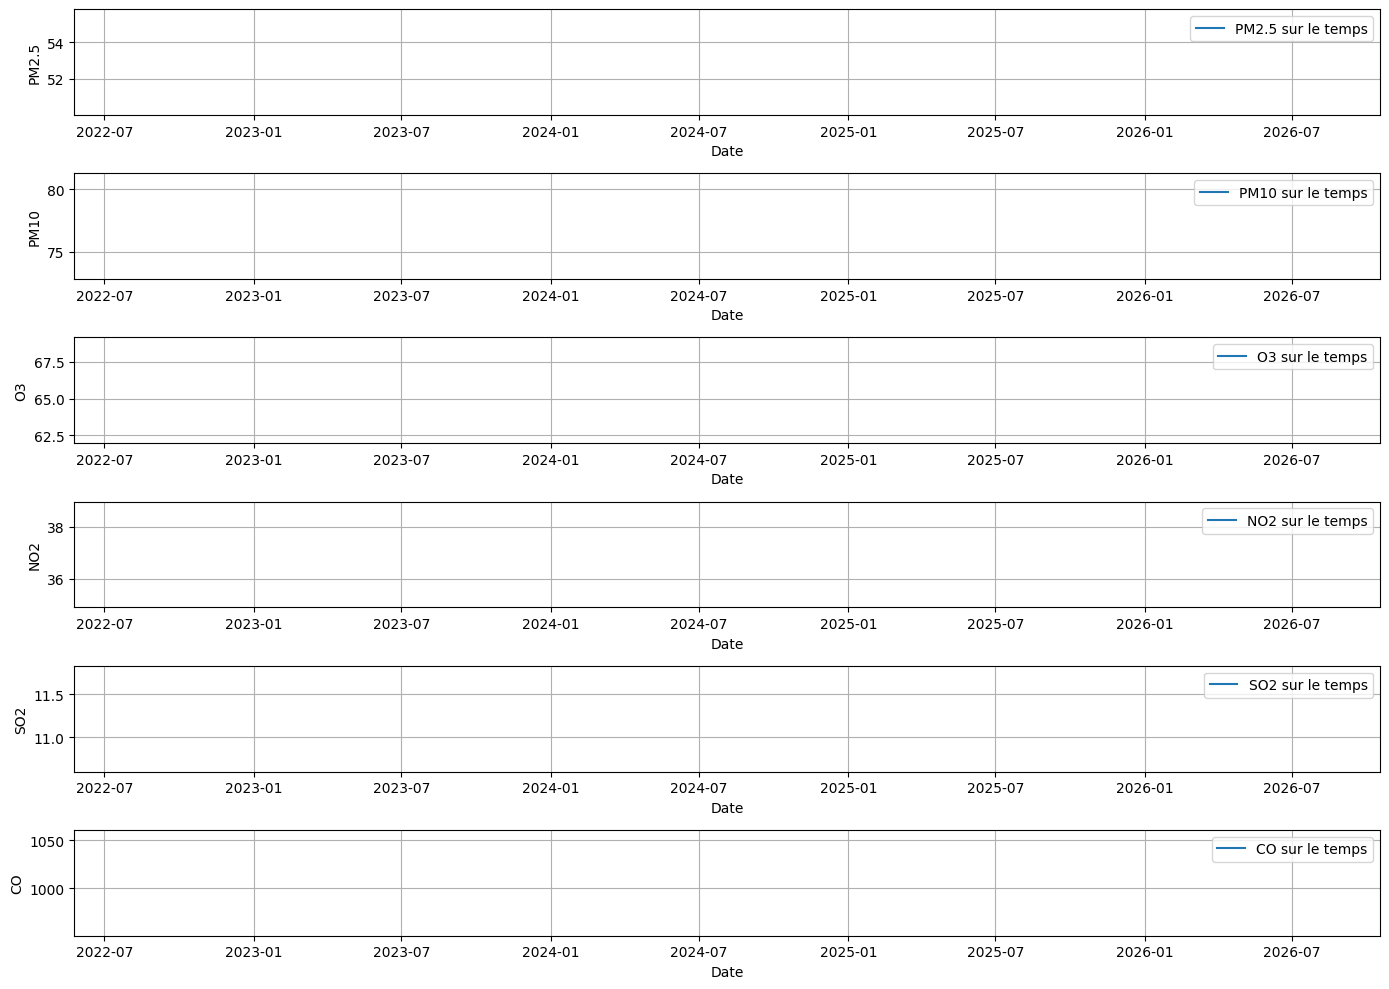

In [13]:
plt.figure(figsize=(14, 10))
for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i + 1)
    plt.plot(daily_data['timestamp'], daily_data[pollutant], label=f'{pollutant} sur le temps')
    plt.xlabel('Date')
    plt.ylabel(pollutant)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig('/home/safidy/airflow/data/pollution_trends.png')
plt.show()

In [14]:
# Analyse des tendances démographiques et géographiques
print("Analyse des tendances démographiques et géographiques...")

Analyse des tendances démographiques et géographiques...


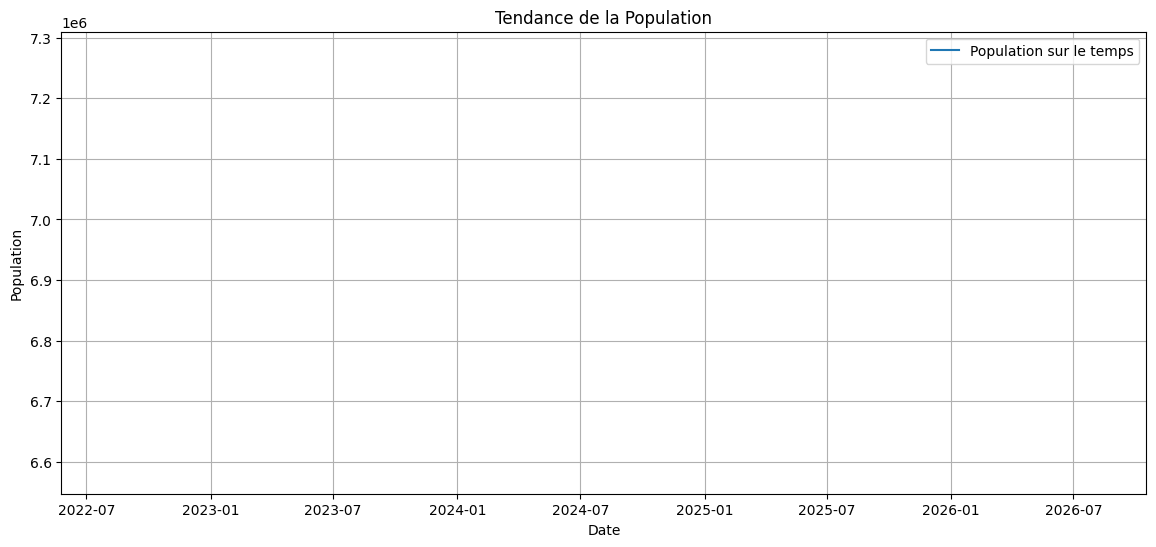

In [15]:
# Exemple pour la population
plt.figure(figsize=(14, 6))
plt.plot(daily_data['timestamp'], daily_data['Population'], label='Population sur le temps')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.title('Tendance de la Population')
plt.savefig('/home/safidy/airflow/data/population_trends.png')
plt.show()